# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [6]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

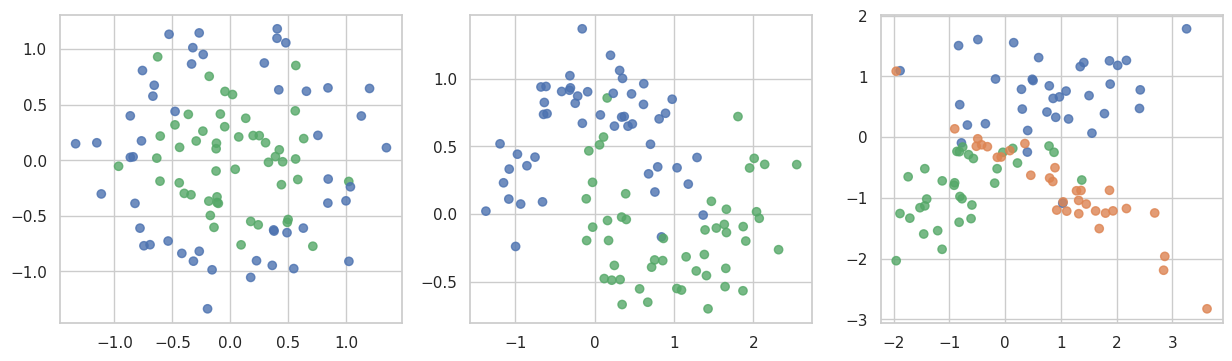

In [7]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [8]:
def plot_surface(clf, X, y, axis = None, title = None, label = None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    if axis:
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    else:
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = None
    if axis:
        cs = axis.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    else:
        cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    
    if axis:
        axis.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                    edgecolors=np.array(palette)[y], linewidths=2)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                    edgecolors=np.array(palette)[y], linewidths=2)
    if axis and title:
        axis.title.set_text(title)
    if label:
        axis.set_xlabel(label)

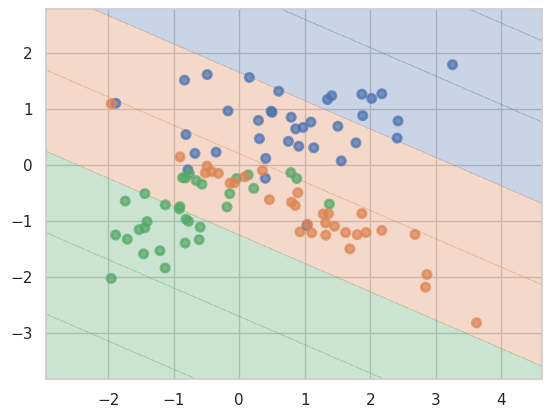

In [9]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

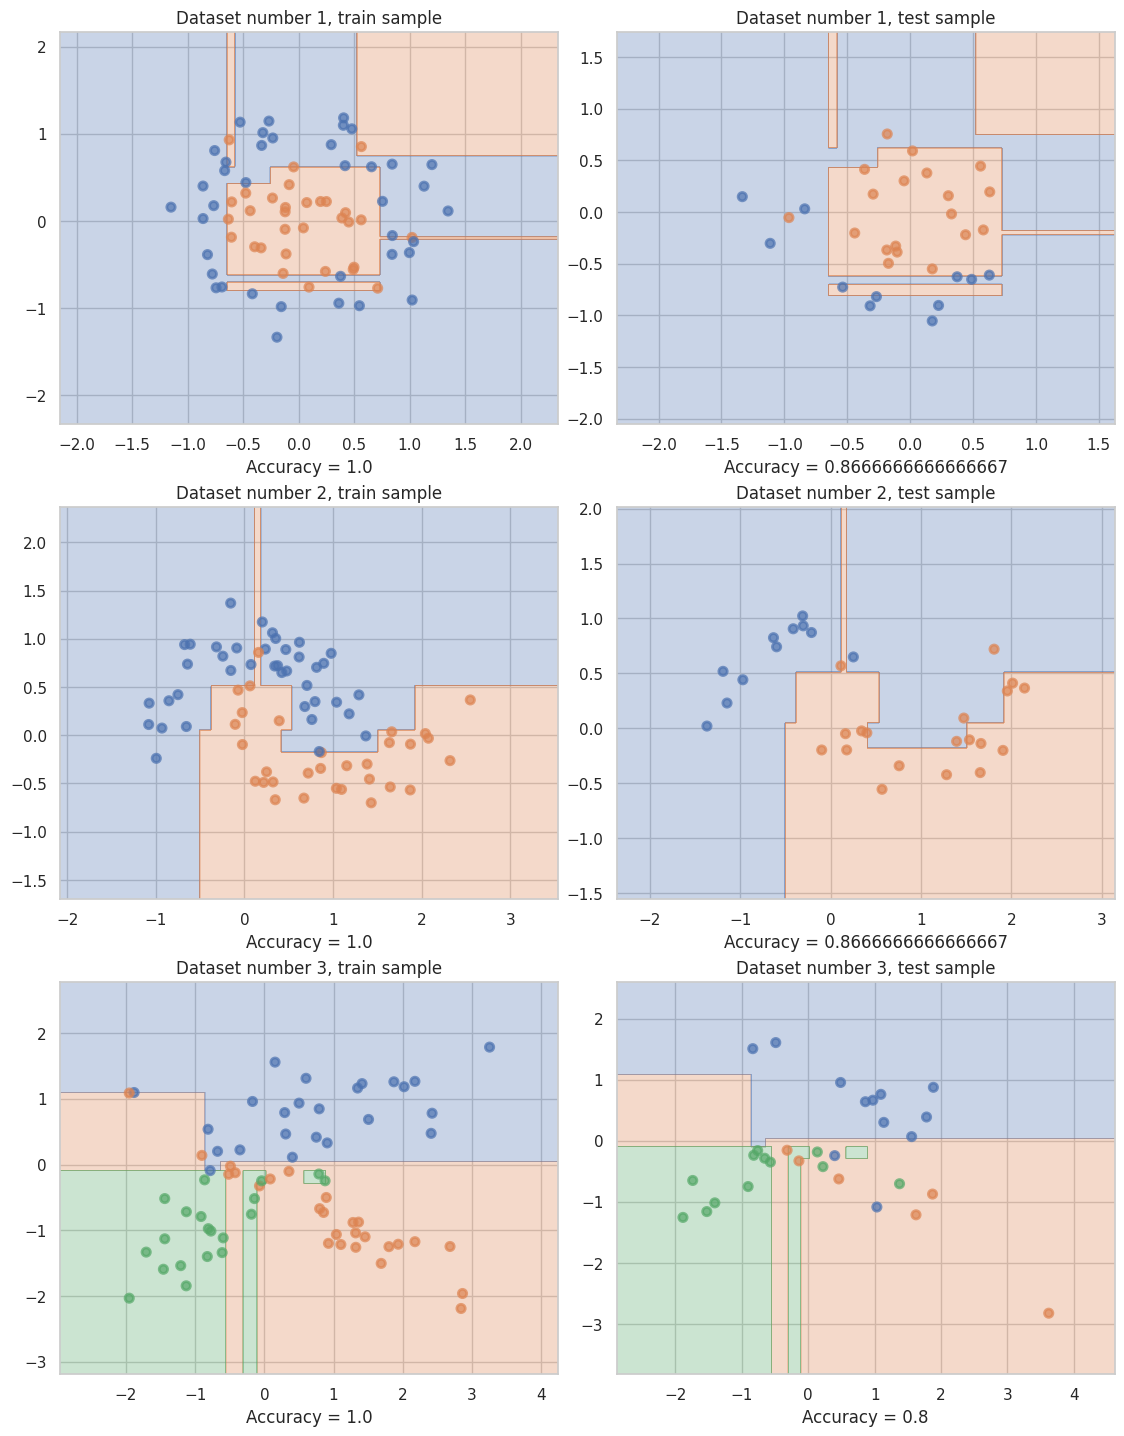

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
datas = [train_test_split(ds[0], ds[1], test_size=0.3, random_state=10) for ds in datasets]
trees = [DecisionTreeClassifier(random_state=42).fit(data[0], data[2]) for data in datas]
figure, axis = plt.subplots(3, 2, figsize=(12, 15))
for i in range(len(datas)):
    train_pred = trees[i].predict(datas[i][0])
    train_true = sum((datas[i][2][id] == train_pred[id]) for id in range(len(datas[i][2])))
    train_acc = train_true / len(train_pred)
    plot_surface(trees[i], datas[i][0], datas[i][2], axis[i, 0], f"Dataset number {i + 1}, train sample", f"Accuracy = {str(train_acc)}")
    test_pred = trees[i].predict(datas[i][1])
    test_true = sum((datas[i][3][id] == test_pred[id]) for id in range(len(datas[i][3])))
    test_acc = test_true / len(test_pred)
    plot_surface(trees[i], datas[i][1], datas[i][3], axis[i, 1], f"Dataset number {i + 1}, test sample", f"Accuracy = {str(test_acc)}")
figure.show()

__Ответ:__ деревья переобучились, тестовая выборка (как и общее количество данных) очень маленькая.

Можно заметить тонкие линии на графиках, а так же странные не соприкосающиеся с основной концентрацией области (в 3 например слева желтый прямоугольник, интуитивно его там быть не должно, просто точка случайно попала). Accuracy на тесте 0.8-0.86, что в купе с маленькими выборками говорит о переобучении.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

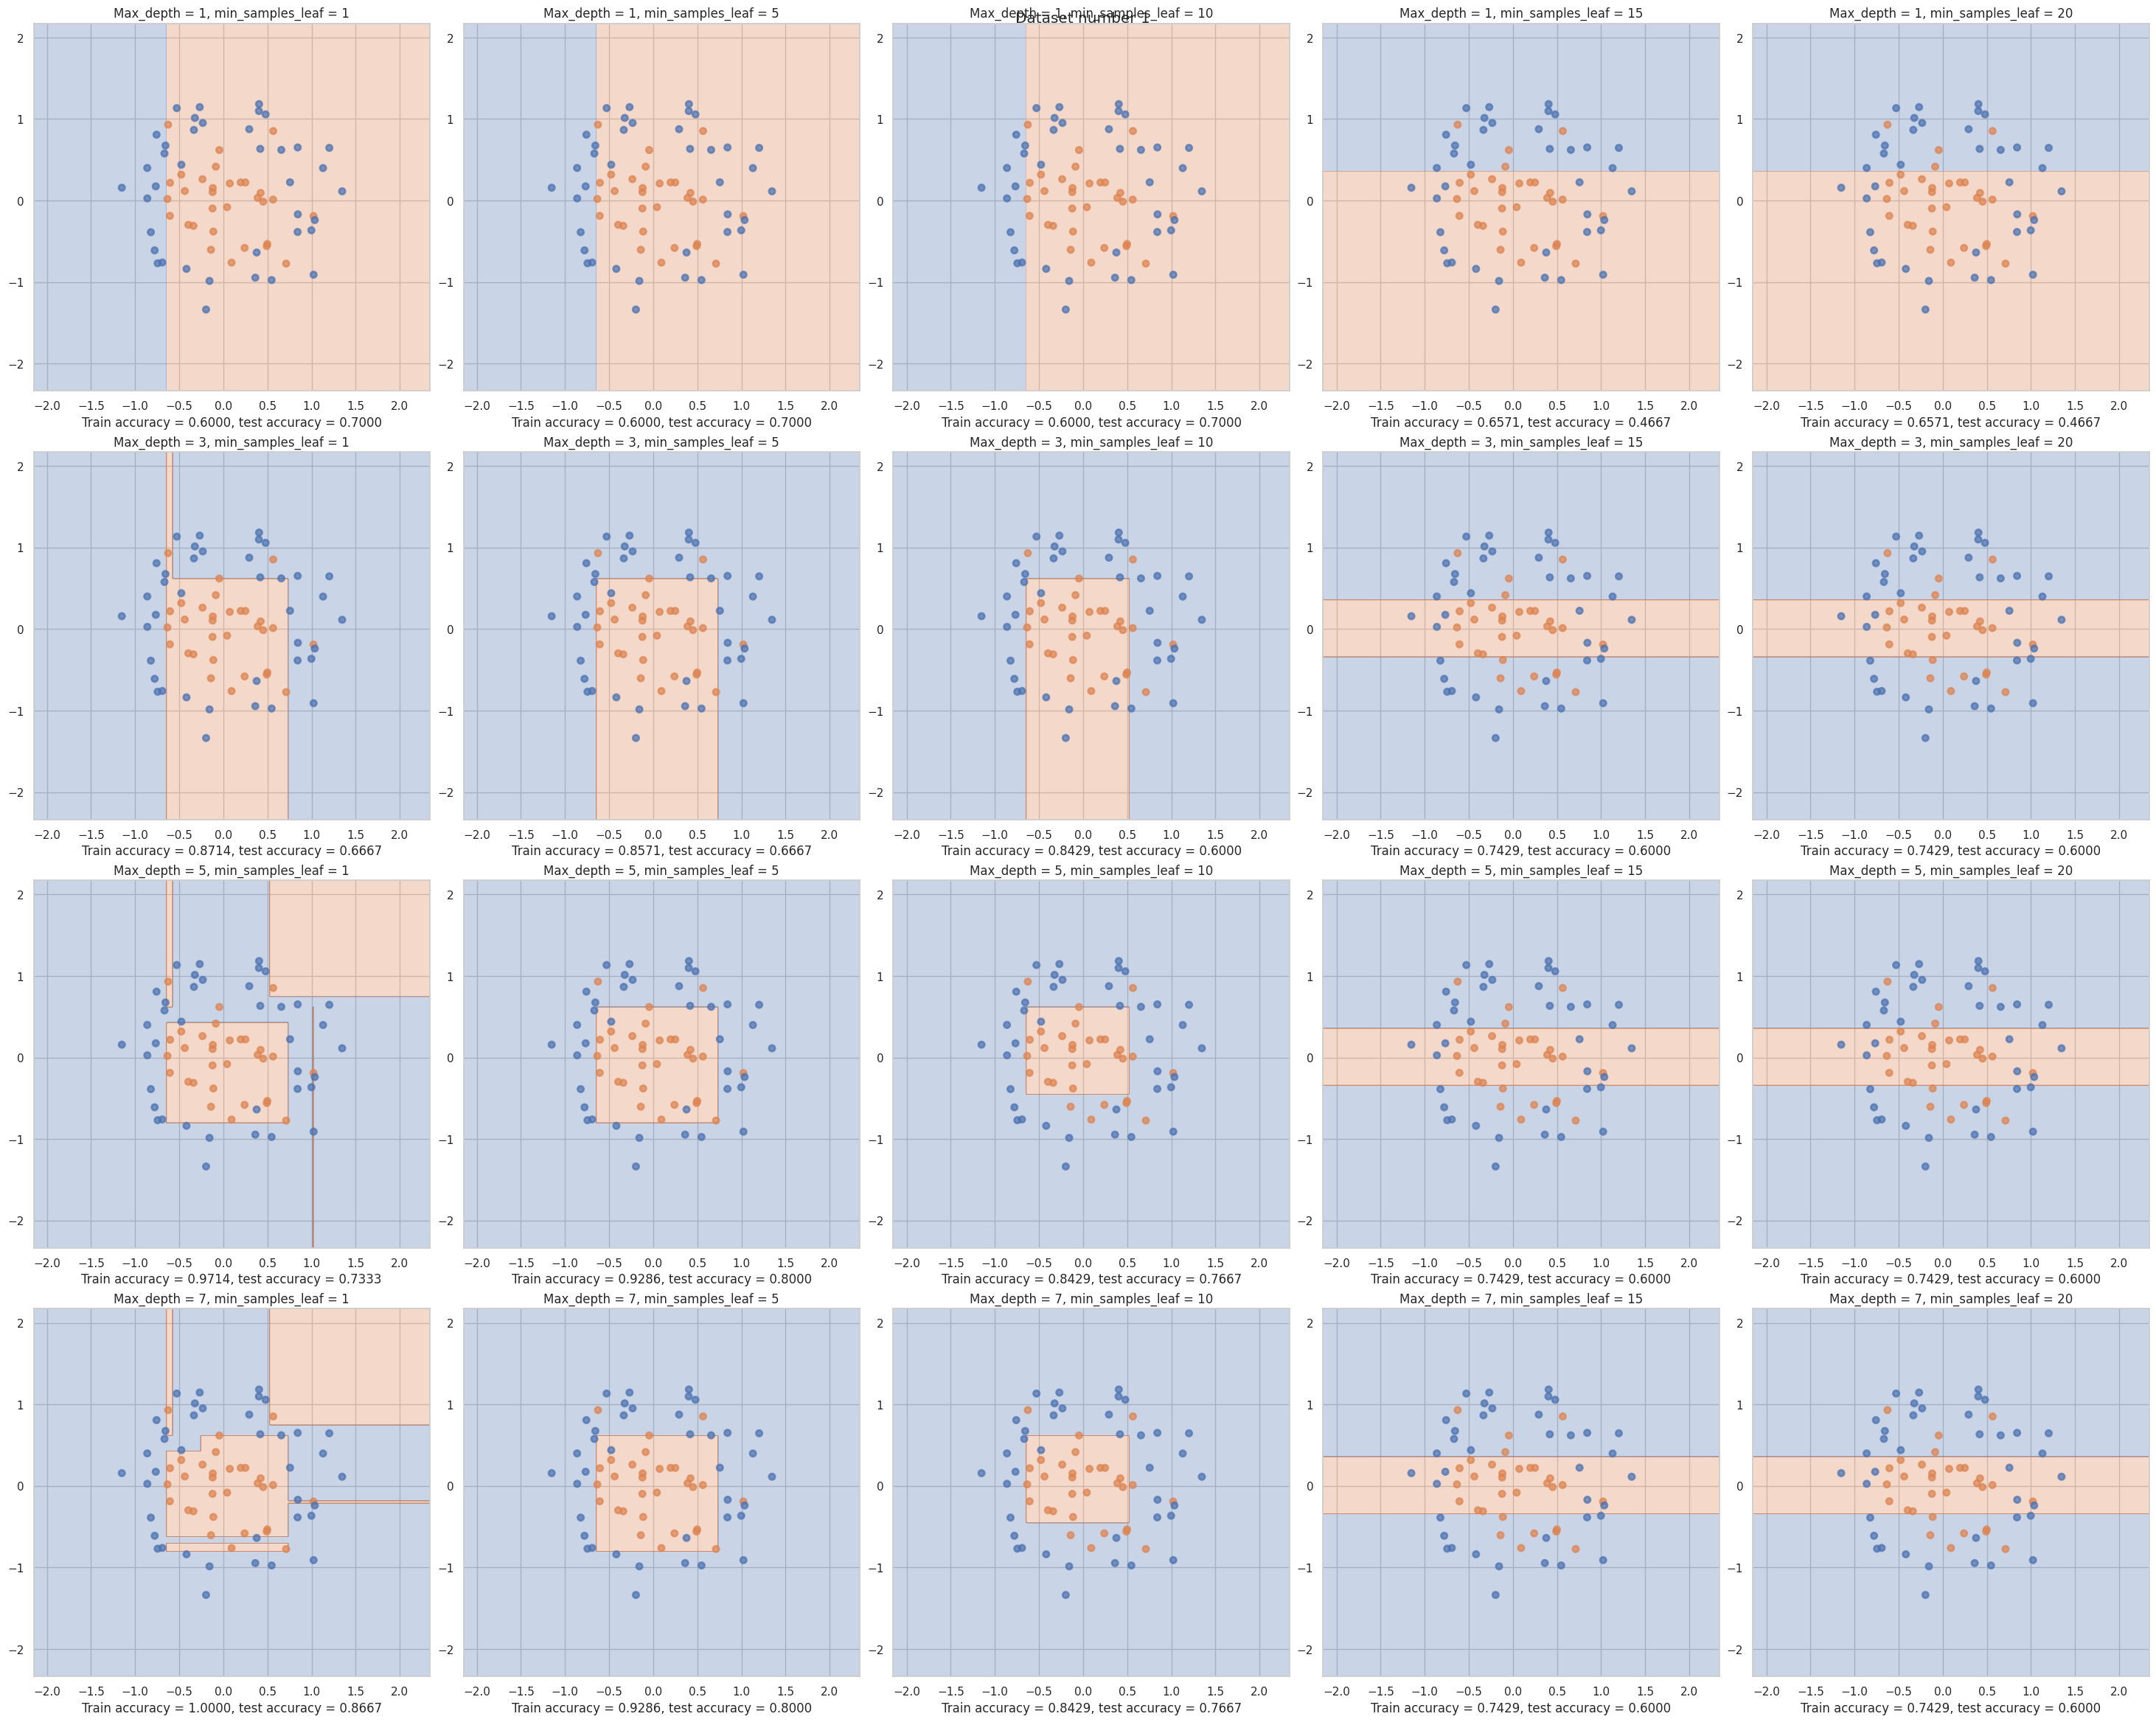

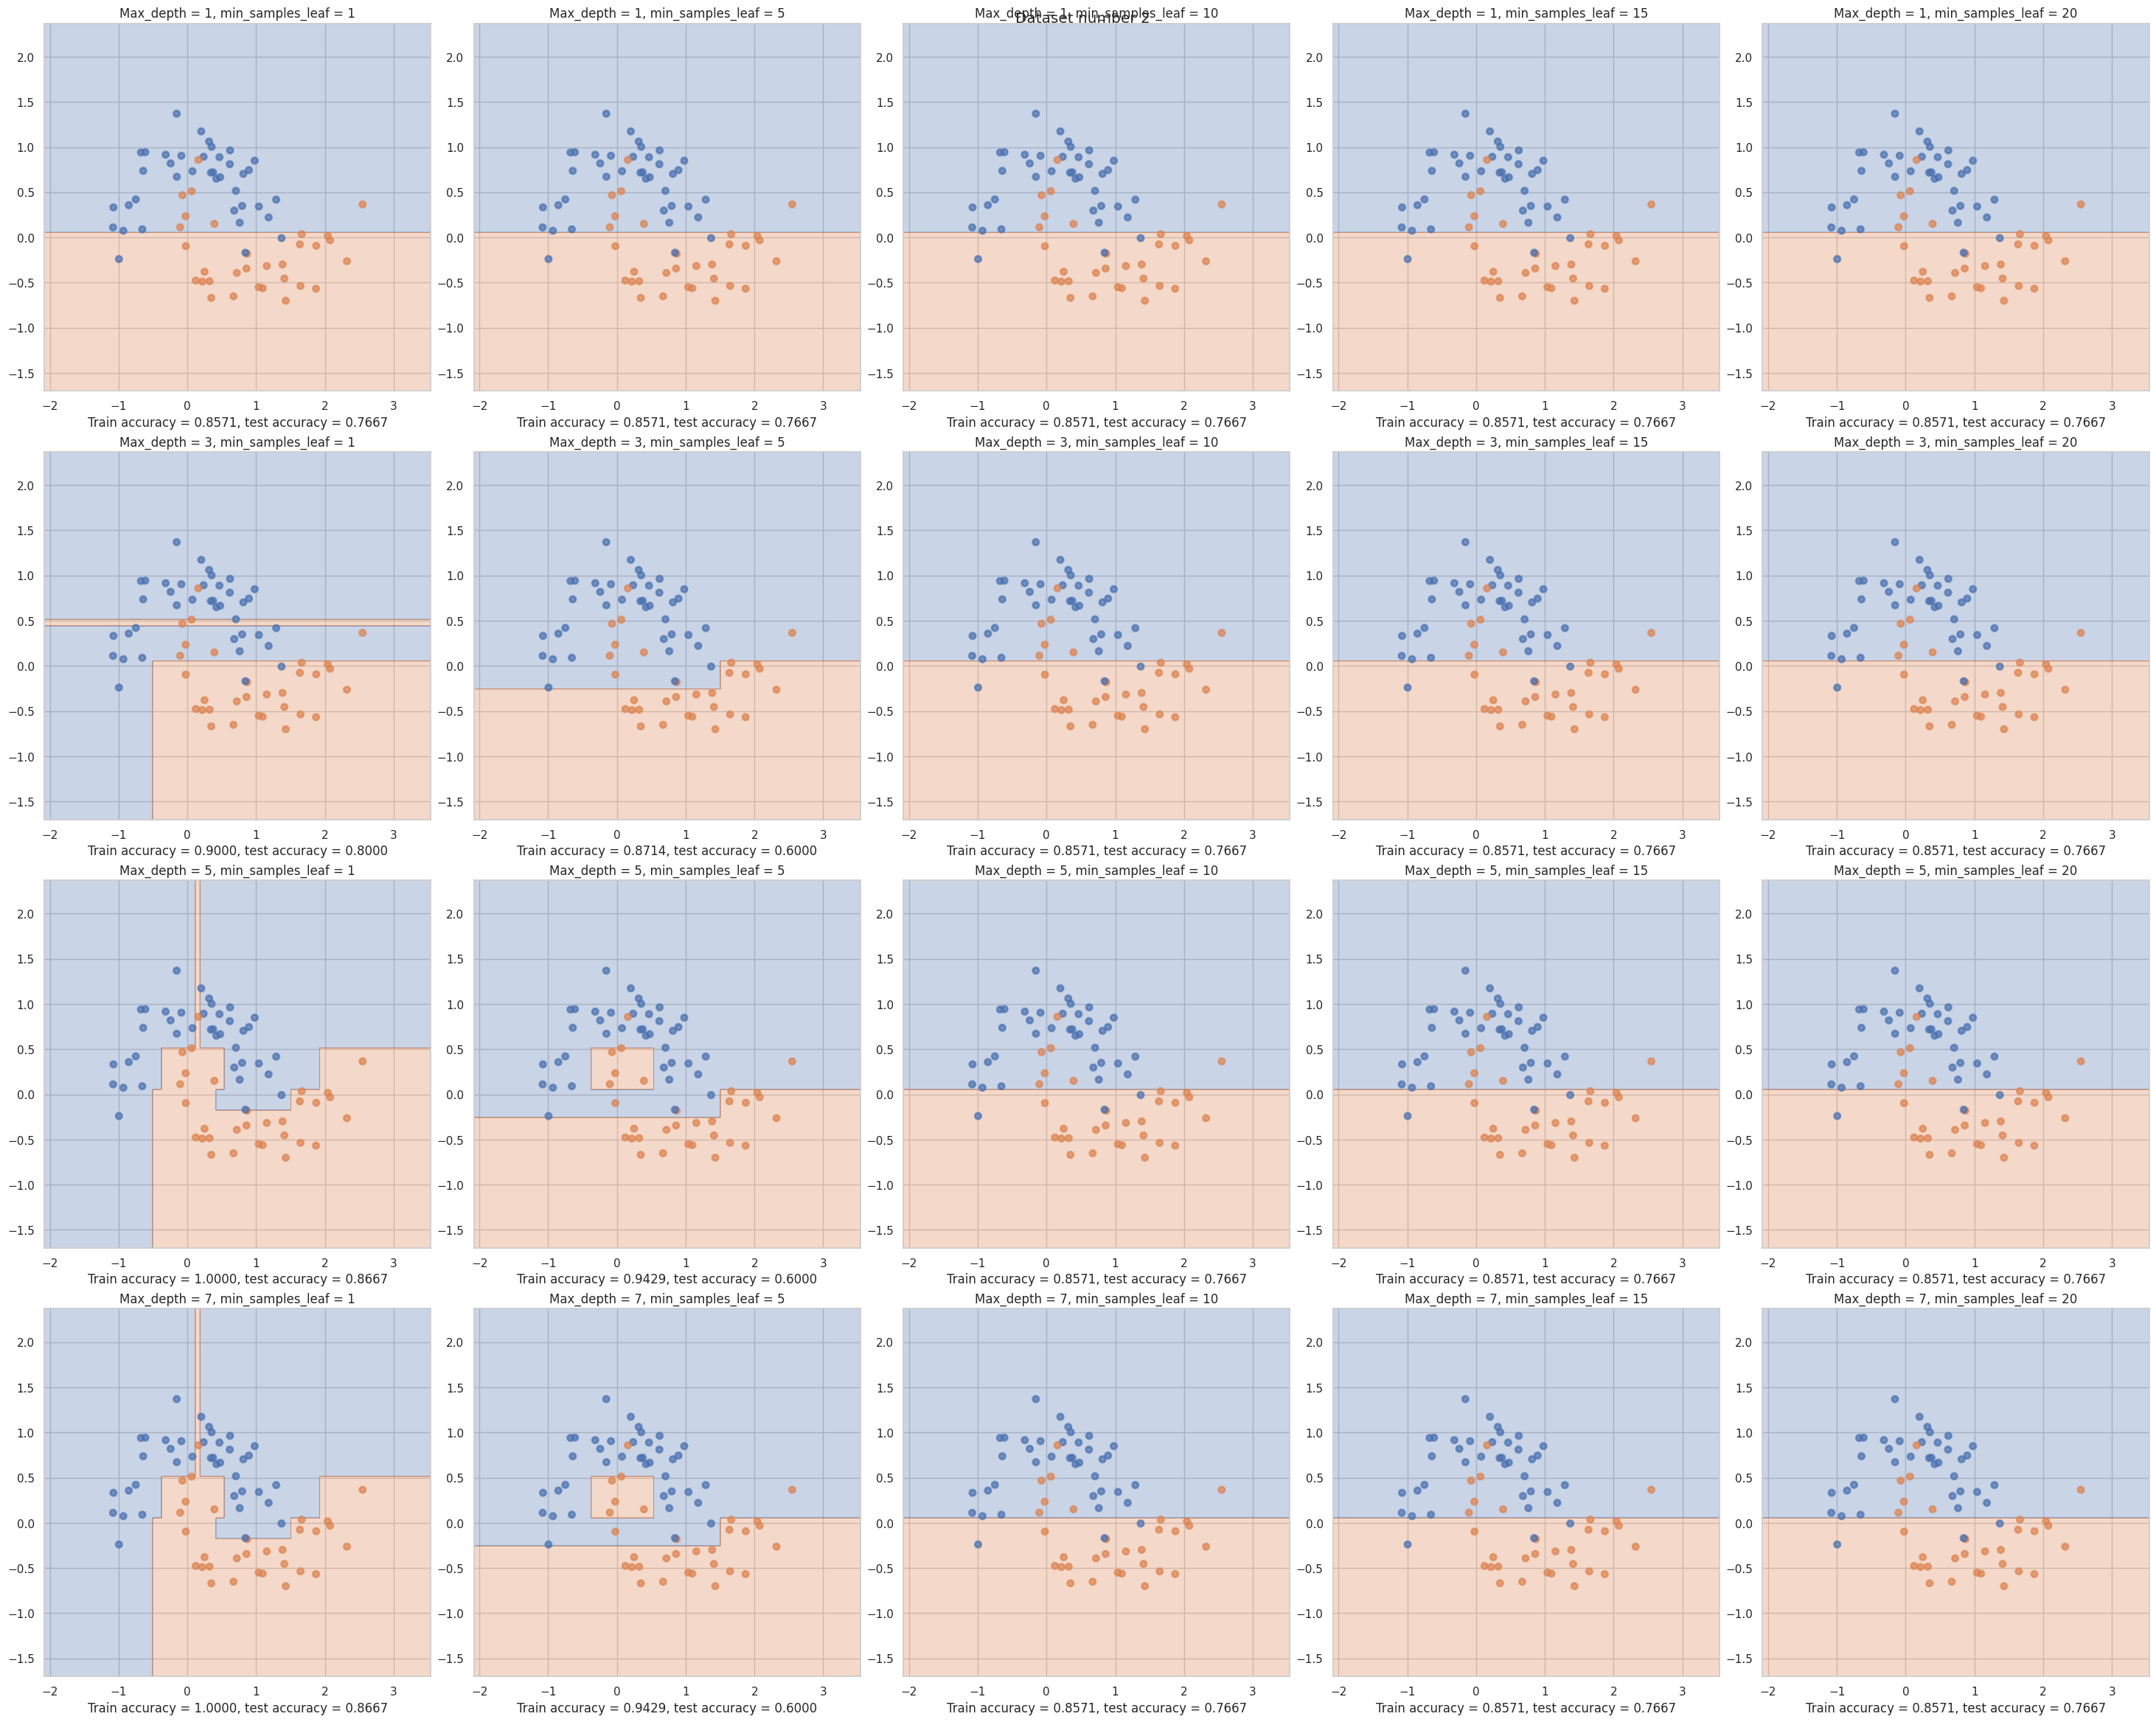

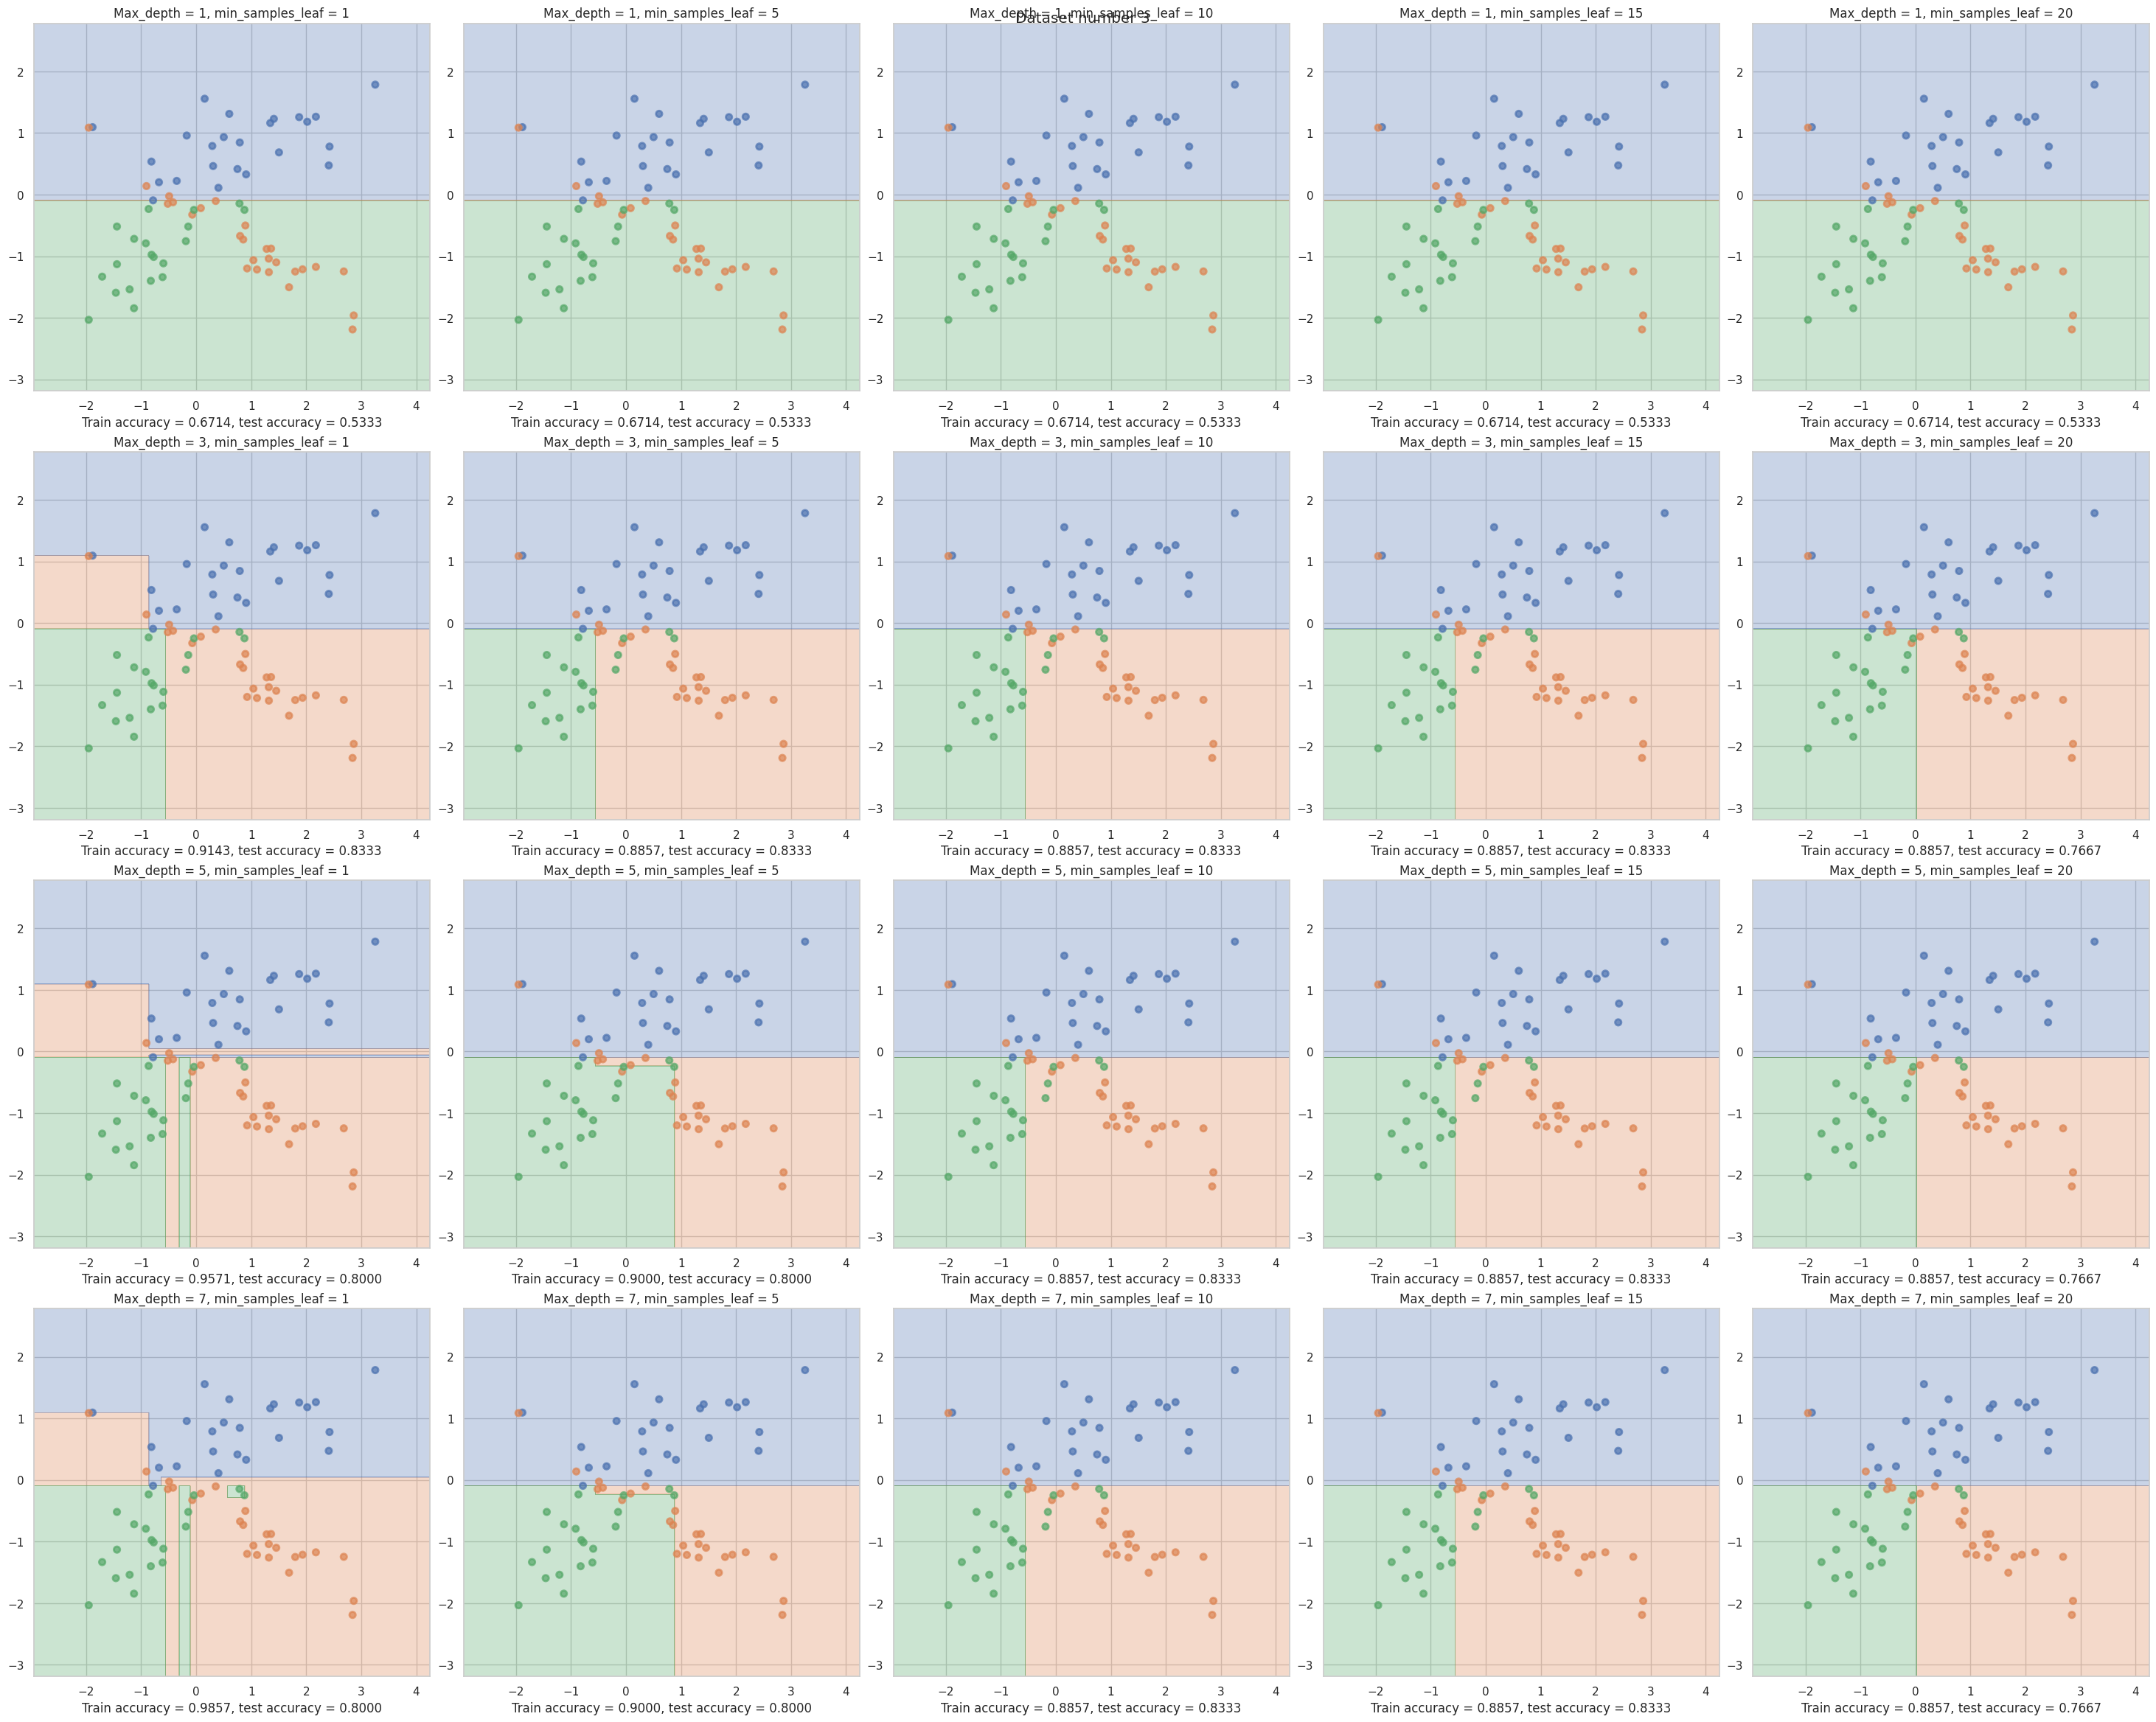

In [11]:
max_depth = [1, 3, 5, 7]
min_samples_leaf = [1, 5, 10, 15, 20]
for id in range(len(datas)):
    data = datas[id]
    tree = trees[id]
    figure, axis = plt.subplots(4, 5, figsize=(30, 24))
    for i in range(len(max_depth)):
        for j in range(len(min_samples_leaf)):
            tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth[i], min_samples_leaf=min_samples_leaf[j]).fit(data[0], data[2])
            train_pred = tree.predict(data[0])
            train_true = sum((data[2][id] == train_pred[id]) for id in range(len(data[2])))
            train_acc = train_true / len(train_pred)
            test_pred = tree.predict(data[1])
            test_true = sum((data[3][id] == test_pred[id]) for id in range(len(data[3])))
            test_acc = test_true / len(test_pred)
            plot_surface(tree, data[0], data[2], axis[i, j],
                         f"Max_depth = {max_depth[i]}, min_samples_leaf = {min_samples_leaf[j]}",
                         f"Train accuracy = {str('{:.4f}'.format(train_acc))}, test accuracy = {str('{:.4f}'.format(test_acc))}"
                        )
    figure.suptitle(f"Dataset number {id + 1}")
    figure.show()


__Ответ:__ При увеличении значения min_samples_leaf можно заметить общую тенденцию на "упрощение" разделяющей поверхности, то есть дерево меньше реагирует на выбросы и строит поверхности более просто, за счет чего падает accuracy на обучающей выборке, но немного растет на тестовой. При этом при больших значениях разделяющая поверхность становится совсем "простой", игнорируя довольно большие скопления точек, из-за чего точность заметно падает.

При увеличении значения max_depth модель стремится переобучиться, становится видно больше выбросов (маленьких полос, прямоугольников, которые могут захватывать 1-2 точки), при совсем же маленьких значениях очевидно дерево очень простое, то есть делится всего на несколько плоскостей и теряют обобщающую способность, практически не обучаясь.

Общий вывод довольно очевидный -- лучшие значения находятся где-то по-середине, крайности это плохо.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [1]:
!curl -LO https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7249  100  7249    0     0  31980      0 --:--:-- --:--:-- --:--:-- 32075


In [12]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [13]:
y = df['UNS']
del df['UNS']

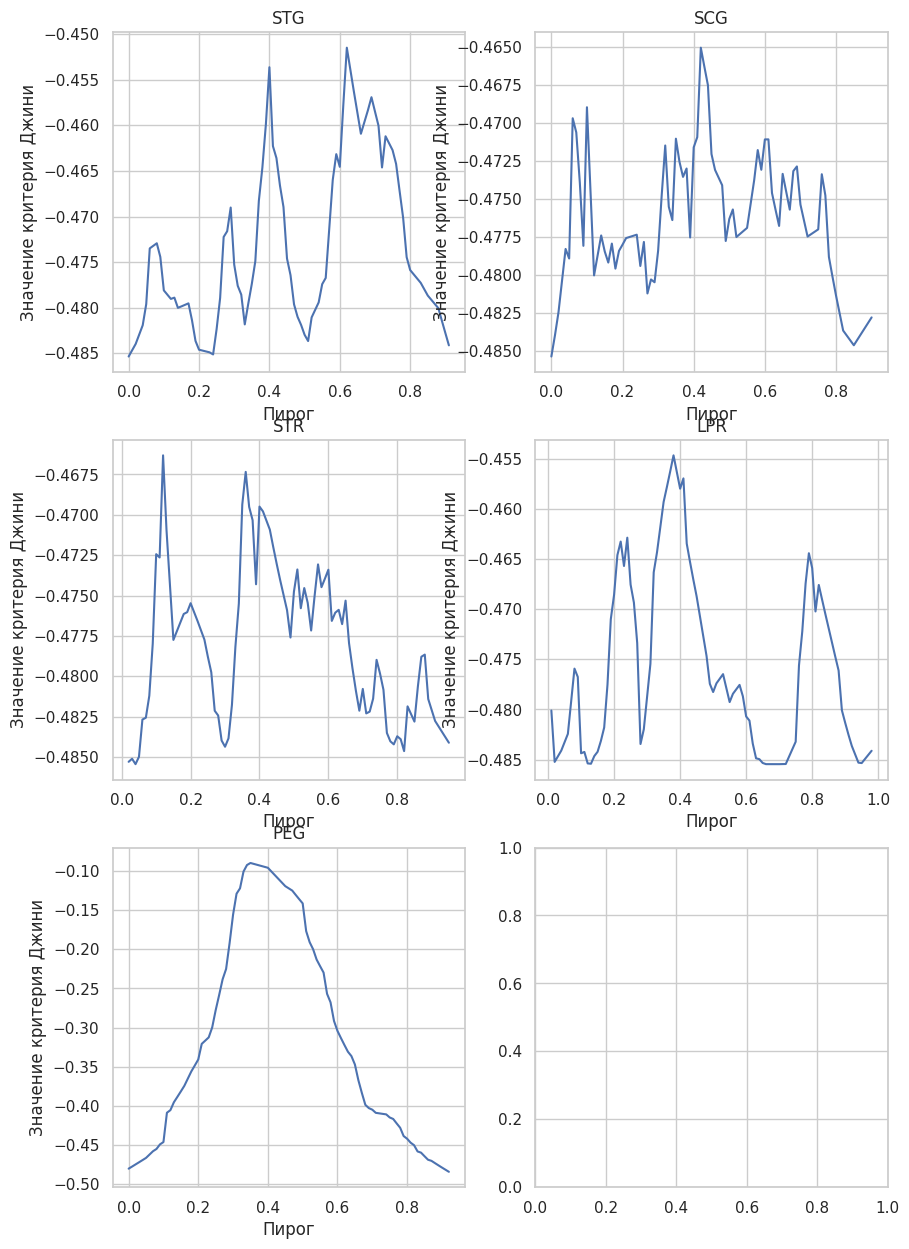

In [26]:
from hw5code import find_best_split
figure, axis = plt.subplots(3, 2, figsize=(10, 15))
id = 0
for feature in list(df):
    a = (id // 2, id % 2)
    t, g, _, _ = find_best_split(df[feature], y)
    axis[a].plot(t, g)
    axis[a].set_xlabel('Пирог')
    axis[a].set_ylabel('Значение критерия Джини')
    axis[a].title.set_text(f"{feature}")
    id += 1

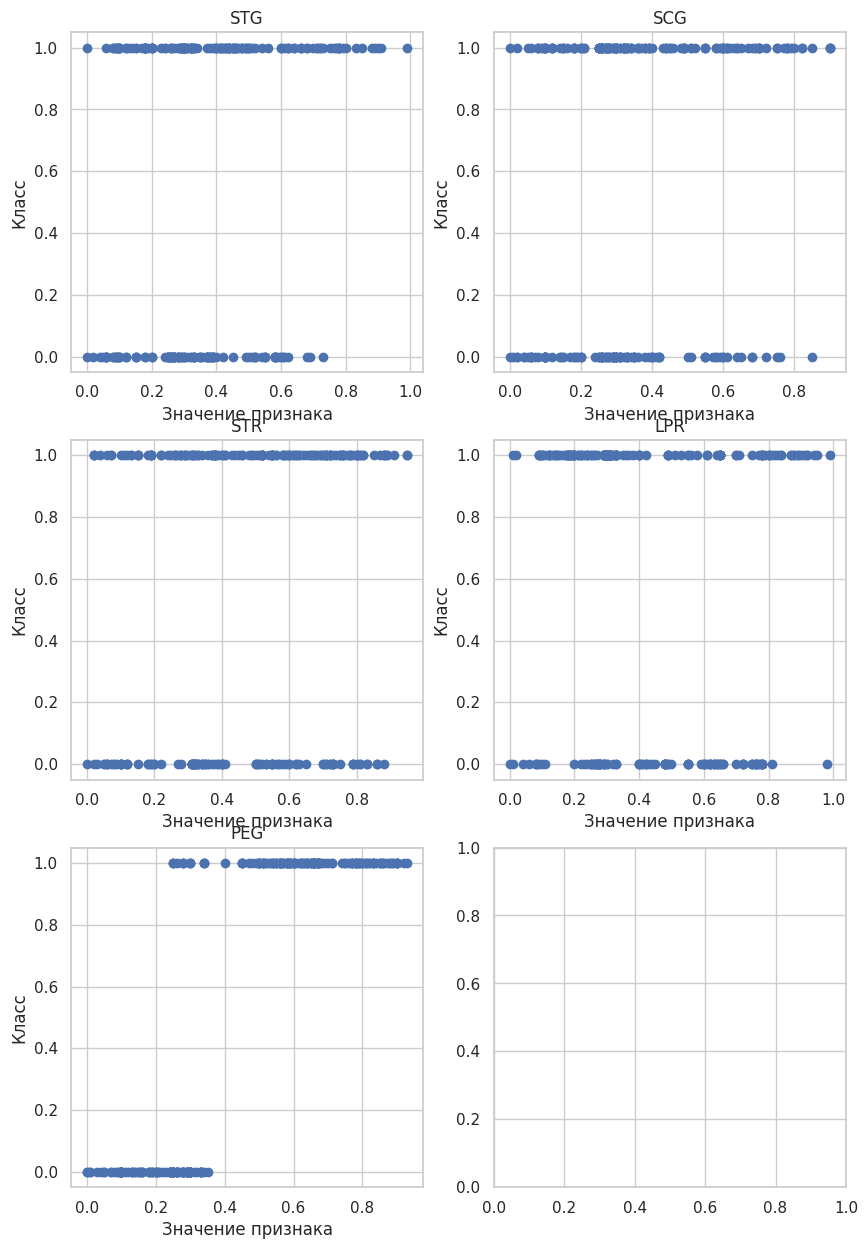

In [27]:
from hw5code import find_best_split
figure, axis = plt.subplots(3, 2, figsize=(10, 15))
id = 0
for feature in list(df):
    a = (id // 2, id % 2)
    axis[a].scatter(df[feature], y)
    axis[a].set_xlabel(f'Значение признака')
    axis[a].set_ylabel('Класс')
    axis[a].title.set_text(f"{feature}")
    id += 1

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из кривых Джини разбиение нужно проводить по PEG, на графике виден ярко выраженный максимум критерия Джини, когда на графиках для других признаков график имеет множество локальных максимумов, близких к глобальному. Это согласуется с визуальной оценкой scatter-графиков, на них можно увидеть глазами, что признак хорошо делится так, что большинство объектов попадут в нужный класс.

Как я уже написал кривые для признаков "плохих" для деления обладают множеством локальных максимумов, "хорошие" наоборот как можно сделать вывод выглядят более гладко.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [93]:
df = pd.read_csv('agaricus-lepiota.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [94]:
y = df[0]
del df[0]
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
for column in df:
    df[column] = LabelEncoder().fit_transform(df[column])
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5, random_state=10)

In [89]:
# я хз что произошло но оно выкидывает очень странную ошибку в ноутбуке, когда я инклюжу DecisionTree, так что воткну здесь:

In [194]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector, min_samples_leaf=None):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    if np.all(feature_vector == feature_vector[0]):
        return [], [], np.inf, np.inf
    feat = np.array(feature_vector.tolist())
    target = np.array(target_vector.tolist())
    sorted_ids = np.argsort(feat).tolist()
    feat, target = feat[sorted_ids], target[sorted_ids]
    lsizes = np.arange(1, len(feat))
    lsizes_frac = lsizes / len(feat)
    rsizes = np.arange(len(feat) - 1, 0, -1)
    rsizes_frac = rsizes / len(feat)
    sm = np.sum(target)
    pl1 = np.cumsum(target[:len(target) - 1])
    # pr1 = pl1[1:]
    pr1 = sm - pl1
    pl0 = lsizes - pl1
    pl1 = pl1 / lsizes
    pl0 = pl0 / lsizes
    target = np.flip(target)
    # print(len(pl1), len(pr1))
    # print(len(pl1), len(pr1), pr1)
    pr0 = rsizes - pr1
    pr1 = pr1 / rsizes
    pr0 = pr0 / rsizes
    hl = 1 - np.power(pl1, 2) - np.power(pl0, 2)
    hr = 1 - np.power(pr1, 2) - np.power(pr0, 2)
    q = -lsizes_frac * hl - rsizes_frac * hr

# 0 0 0 0 1 1 1 1 0 0 1 1 1 0
# 0 0 0 0 1 2 3 4 4 4 5 6 7 7
# 0 1 2 3 3 3 4 5 6 7 7 7 7 7
# 7 7 7 7 7 6 5 4 3 3 3 2 1 0
# 0 0 0 0 1 2 3 4 4 4 5 6 7
# 7 7 7 7 7 6 5 4 3 3 3 2 1 0
    _, ids = np.unique(feat, return_index=True)
    if min_samples_leaf:
        ids = ids[ids >= min_samples_leaf - 1]
        ids = ids[ids <= len(feat) - min_samples_leaf - 1]
    # print()
    # print(feat)
    if len(ids) < 2:
        return [], [], np.inf, np.inf
    feat = feat[ids]
    thresholds = (np.array(feat[1:].tolist()) + np.array(feat[:len(feat) - 1].tolist())) / 2
    # print(len(thresholds), len(q), len(feature_vector), len(feat[1:] + feat[:len(feat) - 1]), len(feat[1:]), len(feat[:len(feat) - 1]))
    # print(feat[1:])
    # print(feat[:len(feat) - 1])
    # print(np.array(feat[1:].tolist()) + np.array(feat[:len(feat) - 1].tolist()))
    # thresholds = thresholds[ids]
    # print(ids)
    ids = np.delete(ids, 0)
    # print(ids)
    # print(q)
    q = q[ids - 1]
    # print(len(thresholds), len(q), len(feature_vector), len(feat[1:] + feat[:len(feat) - 1]), len(feat[1:]), len(feat[:len(feat) - 1]))
    # print(feat[1:])
    # print(feat[:len(feat) - 1])
    # print(np.array(feat[1:].tolist()) + np.array(feat[:len(feat) - 1].tolist()))
    # print(q)
    return thresholds, q, thresholds[np.argmax(q)], np.max(q)


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")
        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, dep = 0):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if (self._max_depth is not None and dep >= self._max_depth) \
            or (self._min_samples_split is not None and len(sub_y) < self._min_samples_split):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                # print(sub_X.iloc[:, feature], feature)
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self._min_samples_leaf)
            if gini != np.inf and (gini_best is None or gini > gini_best):
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], dep + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], dep + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            # print(node["class"])
            return node["class"]
        split = node["feature_split"]
        # print(self._feature_types[split], x)
        if (self._feature_types[split] == "real" and node["threshold"] < x[split]) or \
            (self._feature_types[split] == "categorical" and x[split] not in node["categories_split"]):
            return self._predict_node(x, node["right_child"])
        else:
            return self._predict_node(x, node["left_child"])


    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        # print(X)
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

    def get_params(self, deep=True):
        return {'feature_types': self._feature_types}

In [97]:
types = ["categorical"] * df.shape[1]
tree = DecisionTree(feature_types=types)
# print(X_train.shape[1], df.shape[1], len(types))
# print(X_train.to_numpy())
tree.fit(X_train.to_numpy(), y_train)
pred = tree.predict(X_test.to_numpy())
print(f"accuracy = {np.sum(pred == y_test) / len(y_test)}")

accuracy = 1.0


In [98]:
def get_depth(tree, current_d):
    if tree["type"] == "terminal":
        return current_d
    return max(get_depth(tree["left_child"], current_d + 1), get_depth(tree["right_child"], current_d + 1))
print(f"Глубина дерева = {get_depth(tree._tree, 0)}")

Глубина дерева = 8


Ну дерево не очень глубокое

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [185]:
# tic-tac-toe
df = pd.read_csv('tic-tac-toe-endgame.csv')
# данные расположены отсортированно, не знаю насколько это влияет, но мне не нравится, если кросс валидация берет последовательные фолды, то все плохо будет
df = df.sample(frac=1).reset_index(drop=True)
y = df['V10']
del df['V10']
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
for column in df:
    df[column] = LabelEncoder().fit_transform(df[column])
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=10)

Text(0, 0.5, 'accuracy')

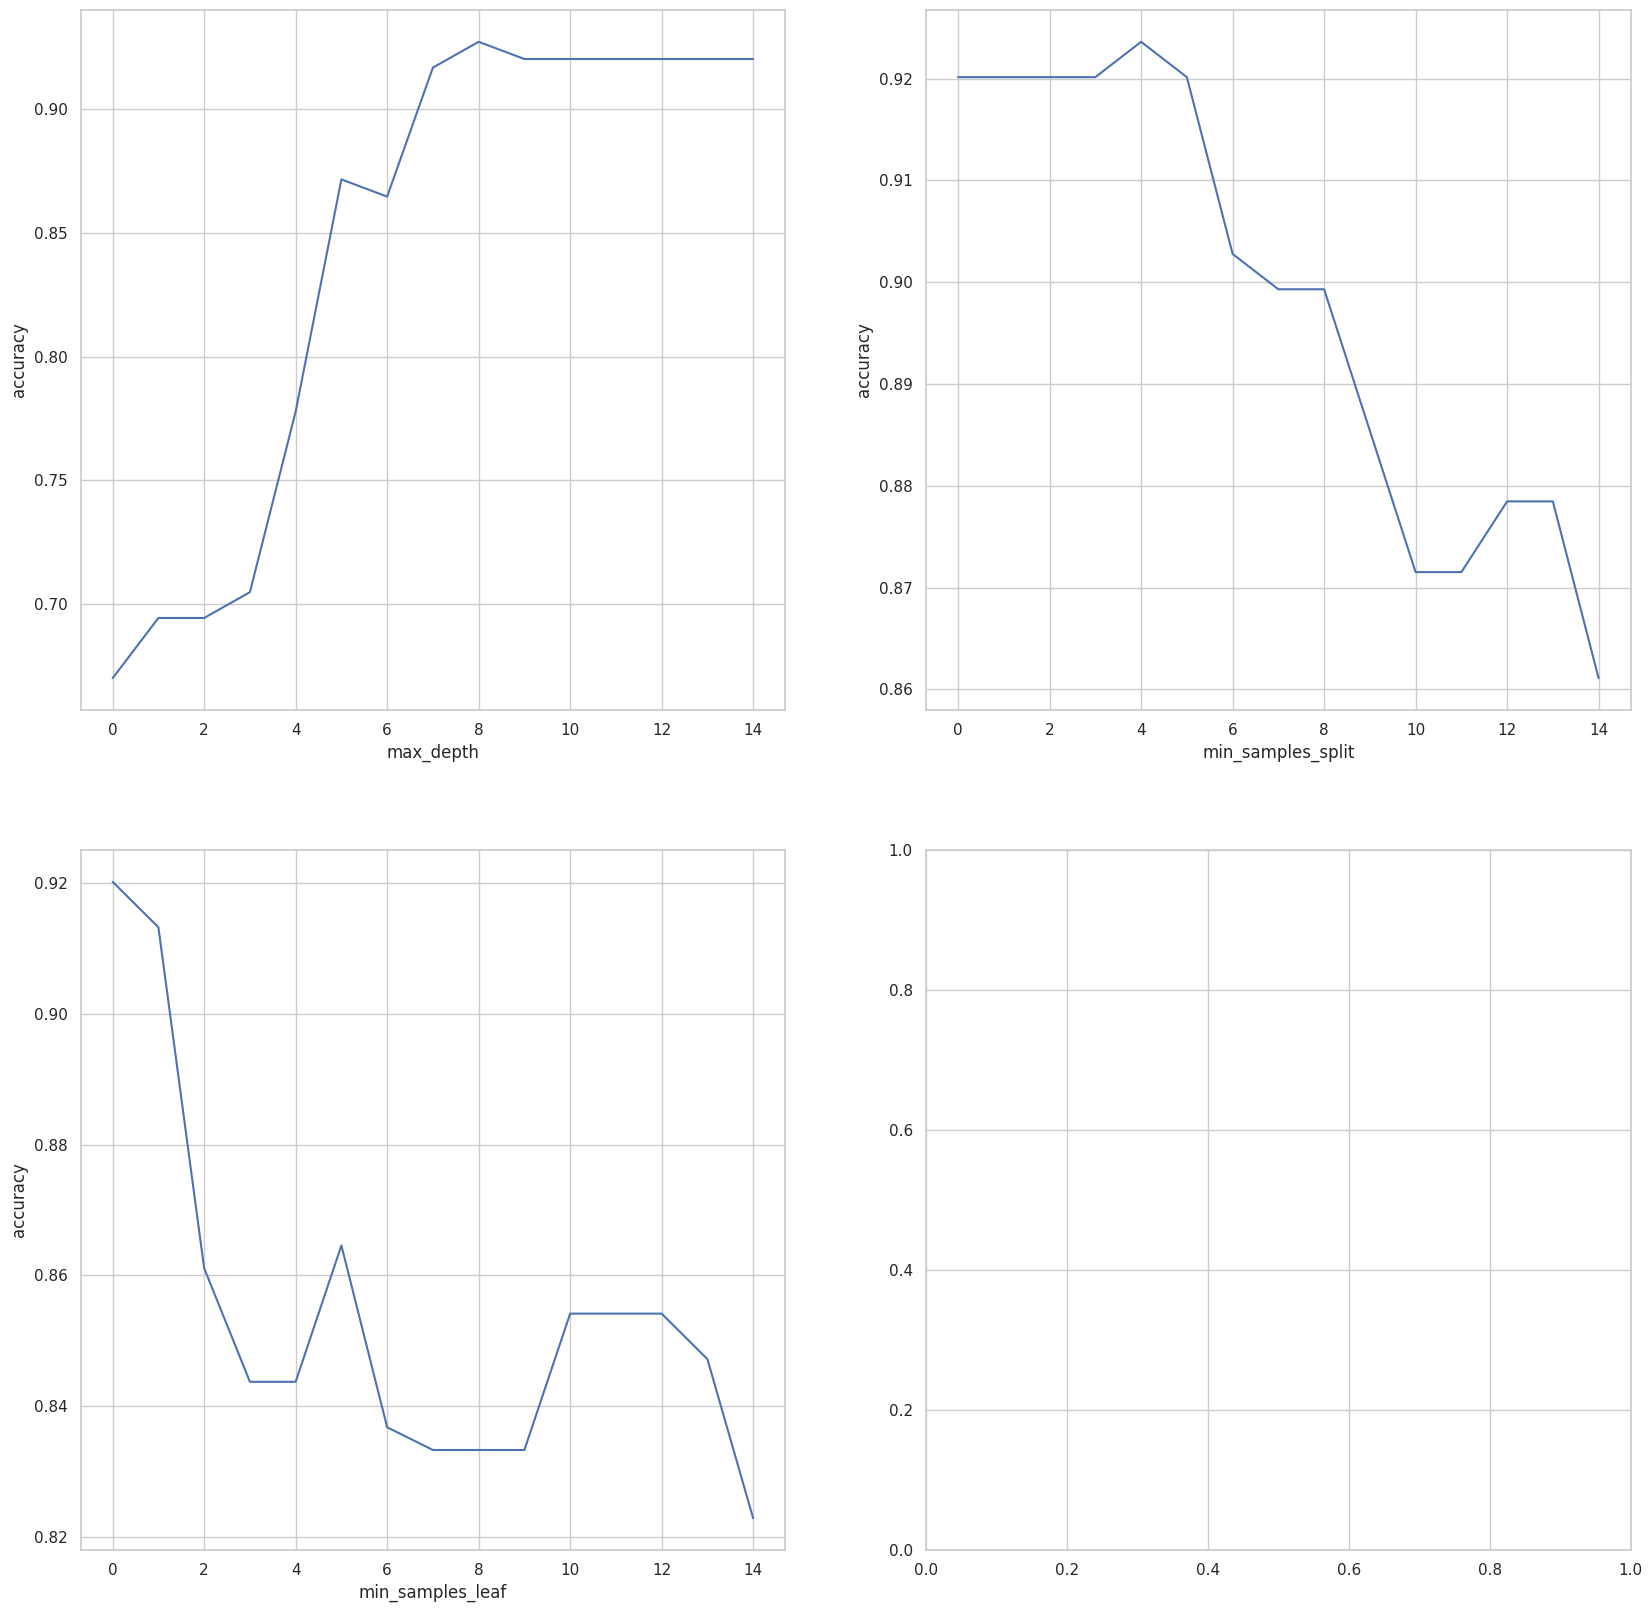

In [200]:
rng = list(range(15))
max_depths_accs = []
min_samples_split_accs = []
min_samples_leaf_accs = []
X_train = X_train
X_test = X_test
for i in rng:
    types = ["categorical"] * X_train.shape[1]

    tree = DecisionTree(feature_types=types, max_depth=i)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    max_depths_accs.append(np.sum(pred == y_test) / len(y_test))

    tree = DecisionTree(feature_types=types, min_samples_split=i)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    min_samples_split_accs.append(np.sum(pred == y_test) / len(y_test))

    tree = DecisionTree(feature_types=types, min_samples_leaf=i)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    min_samples_leaf_accs.append(np.sum(pred == y_test) / len(y_test))
figure, axis = plt.subplots(2, 2, figsize=(20, 20))
axis[(0, 0)].plot(rng, max_depths_accs)
axis[(0, 0)].set_xlabel("max_depth")
axis[(0, 0)].set_ylabel("accuracy")

axis[(0, 1)].plot(rng, min_samples_split_accs)
axis[(0, 1)].set_xlabel("min_samples_split")
axis[(0, 1)].set_ylabel("accuracy")

axis[(1, 0)].plot(rng, min_samples_leaf_accs)
axis[(1, 0)].set_xlabel("min_samples_leaf")
axis[(1, 0)].set_ylabel("accuracy")

Результаты ожидаемые

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [177]:
# preparing data
from sklearn.preprocessing import OneHotEncoder
xs = []
ys = []
df_names = []
o_xs = []

In [178]:
# mushrooms
df = pd.read_csv('agaricus-lepiota.data', header=None)
y = df[0]
del df[0]
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
o_xs.append(OneHotEncoder(sparse_output=False).fit_transform(df))
for column in df:
    df[column] = LabelEncoder().fit_transform(df[column])
xs.append(df)
ys.append(y)
df_names.append('mushrooms')

In [179]:
# tic-tac-toe
df = pd.read_csv('tic-tac-toe-endgame.csv')
# данные расположены отсортированно, не знаю насколько это влияет, но мне не нравится, если кросс валидация берет последовательные фолды, то все плохо будет
df = df.sample(frac=1).reset_index(drop=True)
y = df['V10']
del df['V10']
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
o_xs.append(OneHotEncoder(sparse_output=False).fit_transform(df))
for column in df:
    df[column] = LabelEncoder().fit_transform(df[column])
xs.append(df)
ys.append(y)
df_names.append('tic-tac-toe')

In [180]:
# cars
df = pd.read_csv('car.data', header=None)
df = df.sample(frac=1).reset_index(drop=True)
df.head()
y = ((df[6] == 'good') | (df[6] == 'vgood'))
y = y.to_numpy()
del df[6]
from sklearn.preprocessing import LabelEncoder
o_xs.append(OneHotEncoder(sparse_output=False).fit_transform(df))
for column in df:
    df[column] = LabelEncoder().fit_transform(df[column])
xs.append(df)
ys.append(y)
df_names.append('cars')

In [181]:
# nursery
df = pd.read_csv('nursery.data', header=None)
df = df.sample(frac=1).reset_index(drop=True)
df.head()
y = ((df[8] == 'very_recom') | (df[8] == 'priority') | (df[8] == 'spec_prior'))
y = y.to_numpy()
del df[8]
from sklearn.preprocessing import LabelEncoder
o_xs.append(OneHotEncoder(sparse_output=False).fit_transform(df))
for column in df:
    df[column] = LabelEncoder().fit_transform(df[column])
xs.append(df)
ys.append(y)
df_names.append('nursery')

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def sc(tree, x, y):
    return np.mean(cross_val_score(tree, x, y, cv=10, scoring=make_scorer(accuracy_score)))

for df_id in range(0, len(xs)):
    types = ["real"] * xs[df_id].shape[1]
    real_tree = DecisionTree(feature_types=types)
    types = ["categorical"] * xs[df_id].shape[1]
    categorical_tree = DecisionTree(feature_types=types)
    types = ["real"] * o_xs[df_id].shape[1]
    ohe_tree = DecisionTree(feature_types=types)
    std_tree = DecisionTreeClassifier(random_state=42)
    print(f"Dataset {df_names[df_id]}: all real score = {sc(real_tree, xs[df_id].to_numpy(), ys[df_id])}, \
all categorical score = {sc(categorical_tree, xs[df_id].to_numpy(), ys[df_id])}, \
all real ohe score = {sc(ohe_tree, o_xs[df_id], ys[df_id])}, \
standart score = {sc(std_tree, xs[df_id].to_numpy(), ys[df_id])}")

Dataset mushrooms: all real score = 0.9992610837438424, all categorical score = 1.0, all real ohe score = 0.9996305418719211, standart score = 0.9603836062991171
Dataset tic-tac-toe: all real score = 0.8747587719298245, all categorical score = 0.9300328947368423, all real ohe score = 0.9300328947368423, standart score = 0.8873026315789474
Dataset cars: all real score = 0.9930535018147599, all categorical score = 0.991897432450598, all real ohe score = 0.9913227584352734, standart score = 0.9924788277994354
Dataset nursery: all real score = 0.9996913580246914, all categorical score = 0.9996913580246914, all real ohe score = 0.9996913580246914, standart score = 0.999537037037037


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Разберем все по очереди:


Датасет mushrooms -- all categorical показал себя лучше всех, что ожидаемо, ведь там все данные категориальные, однако стоит заметить что остальные алгоритмы так же показали себя хорошо (> 0.99), кроме стандартного дерева, наверное в нем стоит подобрать гиперпараметры для лучшей работы, не знаю.


Датасет tic-tac-toe -- здесь лучше всех оказались all categorical и ohe деревья, так же ожидаемо, ведь все данные категориальные и очень ограничены по значениям. all real оказался совсем плох, похоже воспринимать значения в виде чисел для задачи крестиков ноликов проигрышная затея.


Датасет cars -- внезапно all real оказался лучшим, возможно это произошло из-за того, что пусть данные и визуально категориальные, но категорий слишком много и воспринимать их числами эффективнее, либо же это просто погрешность.


Датасет nursery -- все деревья молодцы, что для меня довольно неожиданно, ведь казалось бы all real должен иметь плохой результат на этом датасете, в мою логику в 3 ночи это немного не вписывается.


Вероятно можно поподбирать гиперпараметры и тем самым улучшить результаты.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

Приятнее предыдущих...